In [73]:
from gammaraytoys import Material, ToyLayeredTracker2D, Interaction, Particle, Photon, Compton, Absorption, EventList   
from gammaraytoys.detectors import Reconstructor
from gammaraytoys.coordinates import Cartesian2D
from gammaraytoys.physics import ComptonPhysics2D
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import Angle
from astropy.coordinates import CartesianRepresentation
from scipy.stats.sampling import SimpleRatioUniforms
import pandas as pd

import yaml

In [35]:
det = ToyLayeredTracker2D(size = 1*u.m, 
                          layer_positions = [1, 0,0.01,.02,.03,.04,0.05]*u.m, 
                          mass_thickness = [1,1,1,1,1,1,1]*u.g/u.cm/u.cm, 
                          energy_resolution = 0.05, 
                          position_resolution = 1*u.mm)

In [33]:
det = ToyLayeredTracker2D(size = 1*u.m, 
                          layer_positions = [1, 0.01]*u.m, 
                          mass_thickness = [1,1]*u.g/u.cm/u.cm, 
                          energy_resolution = 0.01, 
                          position_resolution = 1*u.mm)

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

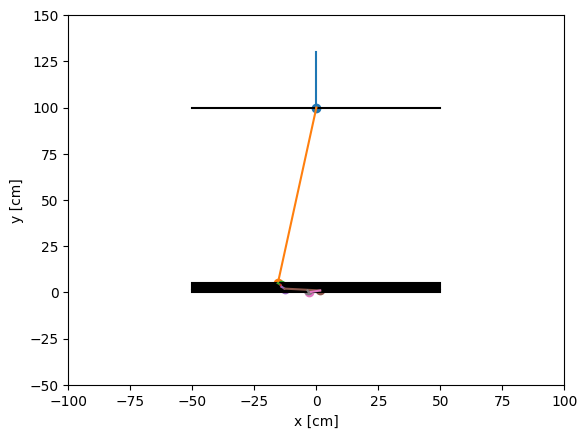

In [69]:
primary = Photon(position = Cartesian2D(x = 0*u.m, y = 1.3*u.m),
                 direction = -90*u.deg,
                 energy = 1*u.MeV)

sim_event = det.simulate_event(primary)

hits =  sim_event.hits
tot_energy = np.sum(hits.energy)

compton_angle = ComptonPhysics2D(tot_energy).scattering_angle(tot_energy - hits.energy[hits.layer == 0])

#chi_dir = hit.pos

det.plot(event = sim_event)

In [64]:
hits.position[hits.layer == 0] - 

<Cartesian2D (x, y, z) in mm
    [(-0.95937827, 1001.24613661, -0.)]>

In [66]:
np.mean(hits.position[hits.layer != 0])

<Cartesian2D (x, y, z) in mm
    (41.94326145, 29.48266592, 0.)>

In [58]:
ComptonPhysics2D(tot_energy).scattering_angle(tot_energy - hits.energy[hits.layer == 0])

<Quantity [0.09120506] rad>

In [25]:
np.sum(sim_event.hits.energy)

<Quantity 0.04403017 MeV>

In [82]:
u.g/u.cm/u.cm/u.cm

Unit("g / cm3")

In [85]:
a = pd.read_csv("../../gammaraytoys/materials/data/density.txt",  
            index_col = 0, sep = '\s+', header = 0, comment = '#')

a.attrs['energy_unit'] = u.

In [5]:
class EnergyReconstructor(Reconstructor):

    @property
    def trigger(self):
        return self.hits.nhits >= 2 

    @property
    def energy(self):
        return np.sum(self.hits.energy)

reco_event = EnergyReconstructor(sim_event)

reco_event.energy
reco_event.trigger

False

In [44]:
from histpy import Histogram

h = Histogram(np.geomspace(.2*u.MeV, 5*u.MeV, 100), axis_scale = 'log')

nsim = 1000

for i in range(nsim):
    
    primary = Photon(position = Cartesian2D(x = 45*u.cm, y = 2*u.m),
                 direction = -90*u.deg,
                 energy = 1*u.MeV)

    sim_event = det.simulate_event(primary)

    #reco_event = EnergyReconstructor(sim_event)

    tot_energy = np.sum(sim_event.hits.energy)

    
    
    h.fill()


ValueError: Mismatch between values shape and number of axes

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_scattering_angle_pdf',
 'energy_out',
 'random_scattering_angle',
 'scattering_angle',
 'scattering_angle_pdf']

In [37]:
dir(ComptonPhysics2D)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_scattering_angle_pdf',
 'energy_out',
 'random_scattering_angle',
 'scattering_angle',
 'scattering_angle_pdf']

In [31]:
np.sum(h)

np.float64(689.0)

In [ ]:
h.find_bin([.9,])

(<Axes: xlabel=' [MeV]'>, <ErrorbarContainer object of 3 artists>)

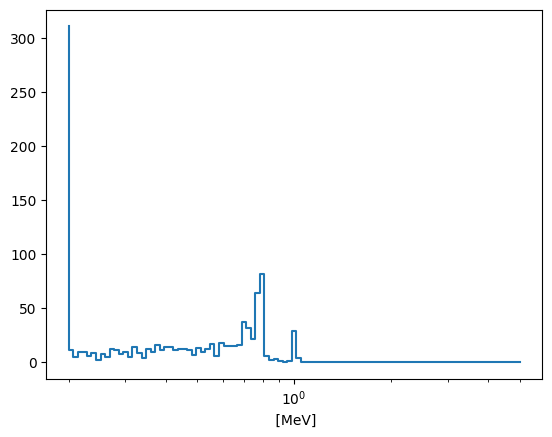

In [32]:
h.plot()

In [ ]:
class SimpleComptonReconstructor(Reconstructor):

    def __init__(self, top_layer, calorimeter_layers):

        self._top_layer = top_layer
        self._cal_layers = calorimeter_layers

    def reconstruct()
    
    @property
    def trigger(self):
        return self.hits.nhits >= 2 

    @property
    def energy(self):
        return np.sum(self.hits.energy)

    @property
    


reco_event = EnergyReconstructor(sim_event)

reco_event.energy
reco_event.trigger

In [3]:
sim_event.hits.energy

In [ ]:
sim_event.hits.energy

In [5]:
sim_event.hits_list

(array([5, 4, 3, 2, 1, 2, 1, 0, 1]),
 <Cartesian2D (x, y, z) in mm
     [(  -1.34810669, 999.63961457, -0.),
      (   8.91269651,  49.19548467,  0.),
      (   3.36663424,  38.82045149,  0.),
      ( -16.31439048,  28.56158171, -0.),
      ( -71.26568456,  22.54077049, -0.),
      (-105.03329653,  29.57840073, -0.),
      (-106.9820726 ,  20.45694943, -0.),
      (-100.91846122,   9.81212737, -0.),
      (-118.20125588,  22.06626975, -0.)]>,
 <Quantity [1.15127289e-04, 1.78493770e-01, 2.09977836e-01, 2.35983498e-02,
            6.43403610e-02, 2.87853973e-01, 2.27595508e-02, 9.43526763e-02,
            1.19366513e-01] MeV>)

In [4]:
for layer, pos, e in sim_event.hits:
    print(layer, pos, e)

5 (0.2631205, 999.76037868, 0.) mm 0.0762808535084069 MeV
4 (289.67776605, 48.85639599, 0.) mm 0.03166900178942449 MeV
3 (290.42736011, 40.53142236, 0.) mm 0.5400538557676972 MeV


In [6]:
sim_event

particle_type: photon
pos_x: 0.0 m
pos_y: 2.0 m
direction: 270.0 deg
energy: 1.0 MeV
chirality: 0.5
interaction:
  interaction_type: compton
  pos_x: -1.83697019872103e-16 m
  pos_y: 1.0 m
  energy: 0.0001138149527973864 MeV
  measurement:
    layer: 5
    pos_x: -1.3481066886385487 mm
    pos_y: 999.6396145725556 mm
    energy: 0.00011512728921025776 MeV
  children:
  - particle_type: photon
    pos_x: -1.83697019872103e-16 m
    pos_y: 1.0 m
    direction: 270.6179795685864 deg
    energy: 0.9998861850472026 MeV
    chirality: 0.5
    interaction:
      interaction_type: compton
      pos_x: 0.010246886626265675 m
      pos_y: 0.05 m
      energy: 0.17943821014419292 MeV
      measurement:
        layer: 4
        pos_x: 8.912696510546162 mm
        pos_y: 49.19548466755262 mm
        energy: 0.1784937695449807 MeV
      children:
      - particle_type: photon
        pos_x: 0.010246886626265675 m
        pos_y: 0.05 m
        direction: 243.26938583146992 deg
        energy: 0.82044

In [4]:
sim_event.hits

ValueError: not enough values to unpack (expected 3, got 0)

In [3]:
dir(Cartesian2D)

['T',
 '_APPLICABLE_FUNCTIONS',
 '_METHOD_FUNCTIONS',
 '__abstractmethods__',
 '__add__',
 '__array_function__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_abc_impl',
 '_apply',
 '_combine_operation',
 '_compatible_differentials',
 '_raise_if_has_differentials',
 '_re_represent_differentials',
 '_scale_operation',
 '_units',
 '_unitstr',
 '_validate_differentials',
 '_values',
 '_xyz',
 'attr_classes',
 'components',
 'copy',
 'cross',

In [2]:
event = Photon(CartesianRepresentation(0*u.m, 2*u.m, 0*u.m), -90*u.deg, 1*u.MeV)
compton = Compton(1, CartesianRepresentation(0*u.m, 1*u.m, z = 0*u.m), .5*u.MeV).add_parent(event)
photon = Photon(CartesianRepresentation(0*u.m, 1*u.m, z = 0*u.m), -90*u.deg, .5*u.MeV).add_parent(compton)
photon = Photon(CartesianRepresentation(0*u.m, 1*u.m, z = 0*u.m), -90*u.deg, .5*u.MeV).add_parent(compton)
absorption = Absorption(0, CartesianRepresentation(0*u.m, 0*u.m, z = 0*u.m), .5*u.MeV).add_parent(photon)

event.set_reco('compton', 1*u.deg, 1*u.MeV)

event_list = EventList()

event_list.append(event)

event_list.write("event_list.yml")

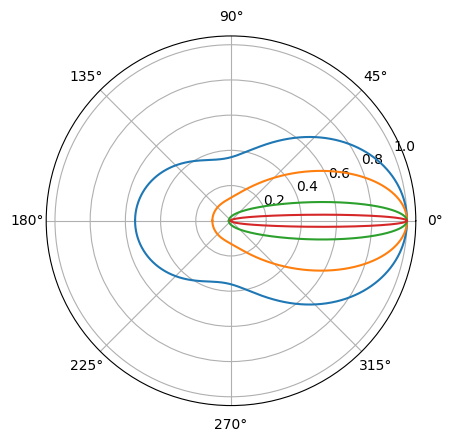

In [86]:
from histpy import Histogram,Axis

theta_plot = Axis(np.linspace(-180,180, 3600)*u.deg)

fig,ax = plt.subplots(subplot_kw={'projection': 'polar'})

for energy in [.1,1,10,100]*u.MeV:

    fun = ComptonPhysics2D(energy).scattering_angle_pdf(theta_plot.centers)

    #fun = KleinNishina2D._angle_pdf((energy/(0.51099895069*u.MeV)).value, theta_plot.centers.to_value(u.rad))
    
    
    ax.plot(theta_plot.centers.to_value(u.rad), fun/np.max(fun))

In [ ]:
compton.

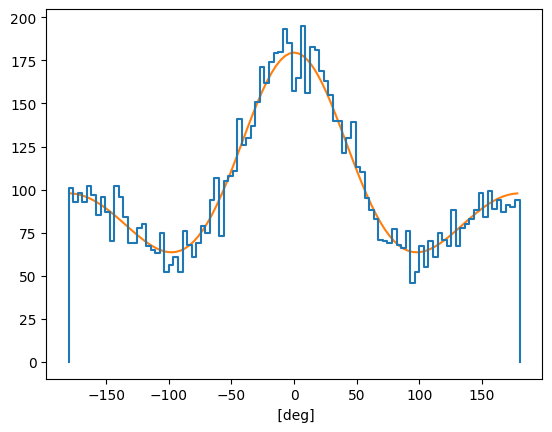

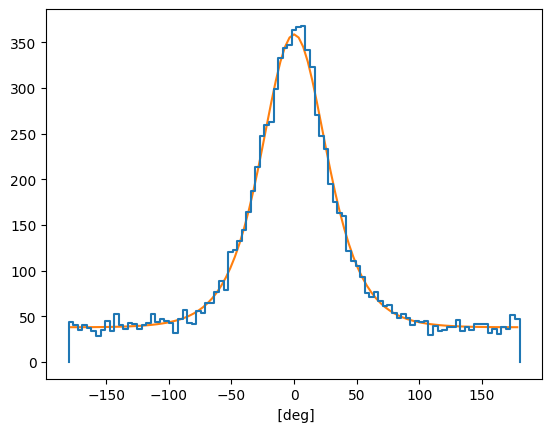

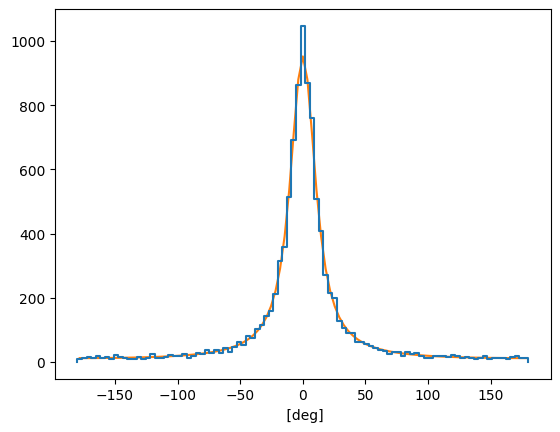

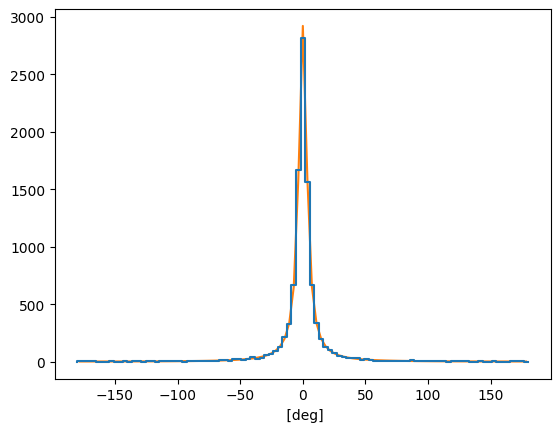

In [5]:
from histpy import Histogram,Axis

theta_hist = Axis(np.linspace(-180,180, 100)*u.deg)

for energy in [.1,1,10,100]*u.MeV:

    n = 10000

    h = Histogram(theta_hist)

    compton = ComptonPhysics2D(energy)
    
    h.fill(compton.scattering_angle_rvs(n))
    
    ax2,_ = h.plot()

    fun = compton.scattering_angle_pdf(theta_hist.centers) * theta_hist.widths.to_value(u.rad) * n
    
    ax2.plot(theta_hist.centers, fun)

In [11]:
((1*u.MeV)/(0.51099895069*u.MeV)).value

1.9569511809167195

In [6]:
import astropy.constants as c
c.m_e

<<class 'astropy.constants.codata2018.CODATA2018'> name='Electron mass' value=9.1093837015e-31 uncertainty=2.8e-40 unit='kg' reference='CODATA 2018'>

In [57]:
pos = CartesianRepresentation(x = 1*u.cm,
                              y = 1*u.cm,
                              z = 0*u.cm,
                              )

In [64]:
np.where([False, True, True])

(array([1, 2]),)

In [63]:
Angle(49*u.deg) > 360*u.deg

False

In [60]:
np.broadcast_to(pos, np.maximum(1, pos.size)).shape

(1,)

In [32]:
Angle(Angle(400*u.deg)).wrap_at(360*u.deg)

<Angle 40. deg>

In [33]:
np.digitize(5,[0,1,2,3,4])

5

In [2]:
det = ToyLayeredTracker2D(size = 1*u.m, 
                          layer_positions = [0, 1]*u.m, 
                          layer_mass_thickness = 1*u.g/u.cm/u.cm, 
                          energy_resolution = 0.01, 
                          position_resolution = 1*u.mm)

/Users/imartin5/software/miniconda3/envs/cosi_nomegalib/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='Energy [MeV]', ylabel='Mass attenuation coefficient [cm2 / g]'>

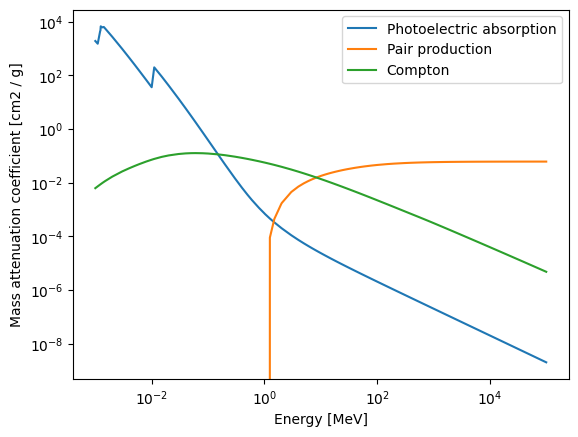

In [3]:
det.material.plot_attenuation()

In [4]:
np.exp(0)

np.float64(1.0)

<AxesSubplot: xlabel='x [cm]', ylabel='y [cm]'>

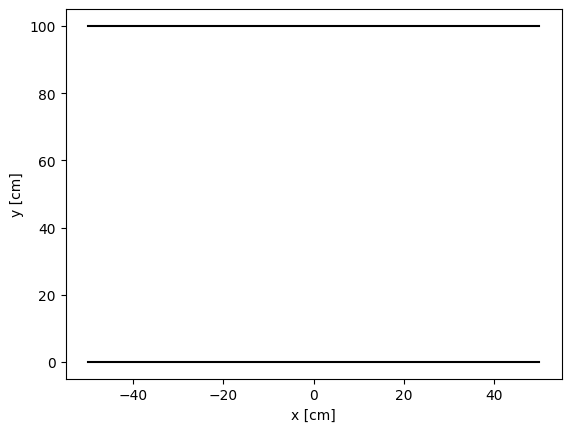

In [3]:
det.plot()

In [54]:
np.sum(KleinNishina2D.angle_pdf(energy, theta_hist.centers) * theta_hist.widths.to_value(u.rad))

0.9988347503252852

In [6]:
Ge = Material.from_name('Ge')

In [9]:
Ge._att_coeff['energy'] *= u.MeV

In [15]:
Ge._att_coeff['energy']

0          0.001000
1          0.001103
2          0.001217
3          0.001217
4          0.001232
          ...      
86     40000.000000
87     50000.000000
88     60000.000000
89     80000.000000
90    100000.000000
Name: energy, Length: 91, dtype: float64

In [14]:
from histpy import Histogram,Axis


theta_plot = Axis(np.linspace(0,360, 3600)*u.deg)
theta_hist = Axis(np.linspace(0,360, 100)*u.deg)

fig,ax = plt.subplots(subplot_kw={'projection': 'polar'})

for energy in [.1,1,10,100]*u.MeV:

    fun = KleinNishina2D.angle_pdf(energy, theta_plot.centers)
    
    ax.plot(theta_plot.centers.to_value(u.rad), fun/np.max(fun))

In [16]:
Point2D(5*u.m, 2*u.m)

TypeError: unexpected keyword arguments: {'copy': True}